In [74]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [75]:
import numpy as np
import pandas as pd

In [76]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [77]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func

In [78]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [79]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [80]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [81]:
session = Session(engine)

In [82]:
# measure_data = session.query(Measurment.date, Measurment.id, Measurment.prcp, 
#                              Measurment.station, Measurment.tobs).all()
# station_data = session.query(Station.elevation, Station.id, Station.latitude, Station.longitude,
#              Station.name, Station.station).all()


In [83]:
latest_date = session.query(Measurement.prcp, Measurement.date).order_by(Measurement.date.desc())
date = []
precipitation = []
year_data = latest_date.filter(Measurement.date >= '2016-08-23' )
for precip in year_data:
    date.append(precip.date)
    precipitation.append(precip.prcp)

In [84]:
latest_date = session.query(Measurement.tobs,Measurement.station, Measurement.date).order_by(Measurement.date.desc())
date_2 = []
tobs = []
stations = []
year_data = latest_date.filter(Measurement.date >= '2016-08-23' )
for tob in year_data:
    date_2.append(tob.date)
    tobs.append(tob.tobs)
    stations.append(tob.station)

In [85]:
data = session.query(Measurement.tobs,Measurement.station, Measurement.date)
date_3 = []
tobs_2 = []
stations_2 = []
for thing in data:
    date_3.append(thing.date)
    tobs_2.append(thing.tobs)
    stations_2.append(thing.station)

In [86]:
df_all_stations = pd.DataFrame({'Date' : date_3, 'Temp' : tobs_2, 'Station' : stations_2})
df_all_stations

,Date,Temp,Station
0,2010-01-01,65.0,USC00519397
1,2010-01-02,63.0,USC00519397
2,2010-01-03,74.0,USC00519397
3,2010-01-04,76.0,USC00519397
4,2010-01-06,73.0,USC00519397
...,...,...,...
19545,2017-08-19,71.0,USC00516128
19546,2017-08-20,78.0,USC00516128
19547,2017-08-21,76.0,USC00516128
19548,2017-08-22,76.0,USC00516128


In [87]:
high_obv_station = df_all_stations['Station'].value_counts().head(1)
station_name = high_obv_station.index[0]

In [88]:
station_name

'USC00519281'

In [89]:
df_highest_station = df_all_stations.loc[df_all_stations['Station']==station_name]

In [90]:
#'2016-08-23'
df_highest_station['Date'] = pd.to_datetime(df_highest_station['Date'])

C:\Users\davef\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [91]:
df_highest_station_graphing = df_highest_station[(df_highest_station['Date'] > '2016-08-23')]

In [92]:
df_highest_station_graphing

,Date,Temp,Station
14608,2016-08-24,77.0,USC00519281
14609,2016-08-25,80.0,USC00519281
14610,2016-08-26,80.0,USC00519281
14611,2016-08-27,75.0,USC00519281
14612,2016-08-28,73.0,USC00519281
...,...,...,...
14954,2017-08-14,77.0,USC00519281
14955,2017-08-15,77.0,USC00519281
14956,2017-08-16,76.0,USC00519281
14957,2017-08-17,76.0,USC00519281


In [93]:
# stations

In [ ]:
# results = session.query(Measurement.tobs).order_by(Measurement.date.desc()).all()

In [94]:
# session.query(Measurement.date, Measurement.prcp).filter().all()

In [95]:
# prcp_data = session.query(Measurment.prcp).all()

In [96]:
df_prcp_base = pd.DataFrame({'Date' : date, 'Precipitation_Inches' : precipitation})

In [97]:
df_sorted = df_prcp_base.sort_values(['Date']).copy()

In [98]:
df_tobs_base = pd.DataFrame({'Date' : date_2, 'Temp' : tobs})

In [99]:
df_tobs_base

,Date,Temp
0,2017-08-23,81.0
1,2017-08-23,82.0
2,2017-08-23,82.0
3,2017-08-23,76.0
4,2017-08-22,82.0
...,...,...
2225,2016-08-23,80.0
2226,2016-08-23,80.0
2227,2016-08-23,80.0
2228,2016-08-23,77.0


In [100]:
# df_prcp_base.sort_values(['Date']).copy()

In [101]:
df_sorted = df_sorted.set_index(['Date'])

In [102]:
df_sorted

,Precipitation_Inches
Date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,NaN
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


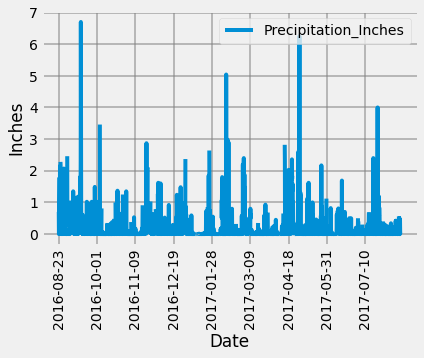

In [103]:
plt.close()
xticks = np.arange(0,2230,250)
xlabels = [df_sorted.iloc[i].name for i in xticks]

df_sorted.plot(y = 'Precipitation_Inches', rot=90)
plt.grid(color='grey', linestyle='-', linewidth=2, alpha=0.5)
plt.xticks(np.arange(0,2230,250), labels= xlabels)
plt.ylabel('Inches')

plt.show()

In [104]:
df_tobs_base['Frequency'] = df_tobs_base['Temp']

In [105]:
df_tobs_sorted = df_tobs_base.drop(['Date'],axis=1).groupby(['Temp'], as_index=False).agg({'Frequency' : 'count'})

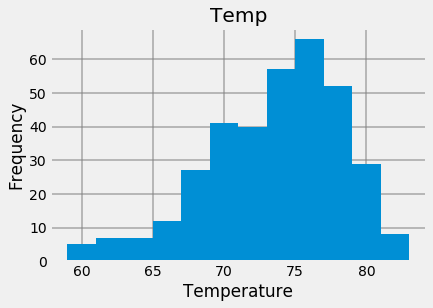

In [106]:
plt.close()
df_highest_station_graphing.hist(column='Temp' ,bins=12)
plt.grid(color='grey', linestyle='-', linewidth=2, alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()

In [107]:
df_station['Temp'].value_counts()

80.0    48
79.0    41
77.0    38
78.0    36
76.0    24
75.0    21
71.0    21
81.0    20
72.0    17
74.0    16
73.0    13
69.0    10
70.0     9
66.0     8
68.0     7
67.0     7
64.0     5
63.0     4
65.0     4
62.0     4
82.0     3
61.0     2
83.0     1
87.0     1
60.0     1
Name: Temp, dtype: int64

In [108]:
df_station = df_stations_base.loc[df_stations_base['Station']== station_name]

In [109]:
df_stations_base = pd.DataFrame({'Date' : date_2, 'Temp' : tobs, 'Station' : stations})

In [110]:
high_obv_station = df_stations_base['Station'].value_counts().head(1)

In [111]:
station_name = high_obv_station.index[0]

In [112]:
print('Highest station stats')
print('-- Max --')
print(df_highest_station['Temp'].max())
print('-- Min --')
print(df_highest_station['Temp'].min())
print('-- Avg --')
print(df_highest_station['Temp'].mean())

Highest station stats
-- Max --
85.0
-- Min --
54.0
-- Avg --
71.66378066378067


In [113]:
df_stations_base['Station'].value_counts()

USC00519397    361
USC00519281    352
USC00516128    349
USC00513117    343
USC00519523    337
USC00514830    305
USC00517948    183
Name: Station, dtype: int64

In [114]:
# reflect an existing database into a new model

# reflect the tables

In [115]:
# We can view all of the classes that automap found


In [116]:
# Save references to each table


In [117]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

In [118]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [119]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [120]:
# Design a query to show how many stations are available in this dataset?


In [121]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [122]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [123]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [124]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [125]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [126]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [127]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [128]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [129]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [130]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [131]:
# Plot the daily normals as an area plot with `stacked=False`


In [139]:
highest_station_id = 'USC00519281'

In [146]:
results = session.query(Measurement.tobs).filter(Measurement.station == highest_station_id).all()

In [147]:
precip = list(np.ravel(results))

In [ ]:
print(precip)

In [ ]:
results